In [2]:
#Refer: http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import parallel_coordinates

In [3]:
X, y = make_blobs(n_samples=230, centers=3, n_features=2, random_state=0) #some random data
X[0:5,:]


array([[-0.19685333,  6.24740851],
       [-0.0603253 ,  3.7704342 ],
       [-1.81874138,  2.15639005],
       [ 0.90802847,  6.01713005],
       [ 1.42717996,  0.41663654]])

In [4]:
y[0:5]

array([0, 2, 2, 0, 1])

In [5]:
X.shape
y.shape

(230,)

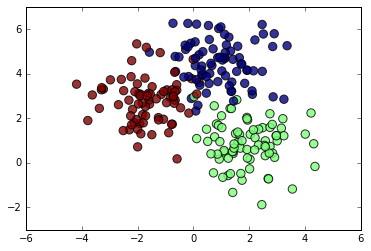

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, s=70,alpha=0.8) #color c based on values of y 0,1,2
plt.show()

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
names = ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 
         'Hue', 'OD280/OD315', 'Proline']
dataset = pd.read_csv(url, names=names)
dataset.shape

(178, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbf3c88910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efbf2f93210>]], dtype=object)

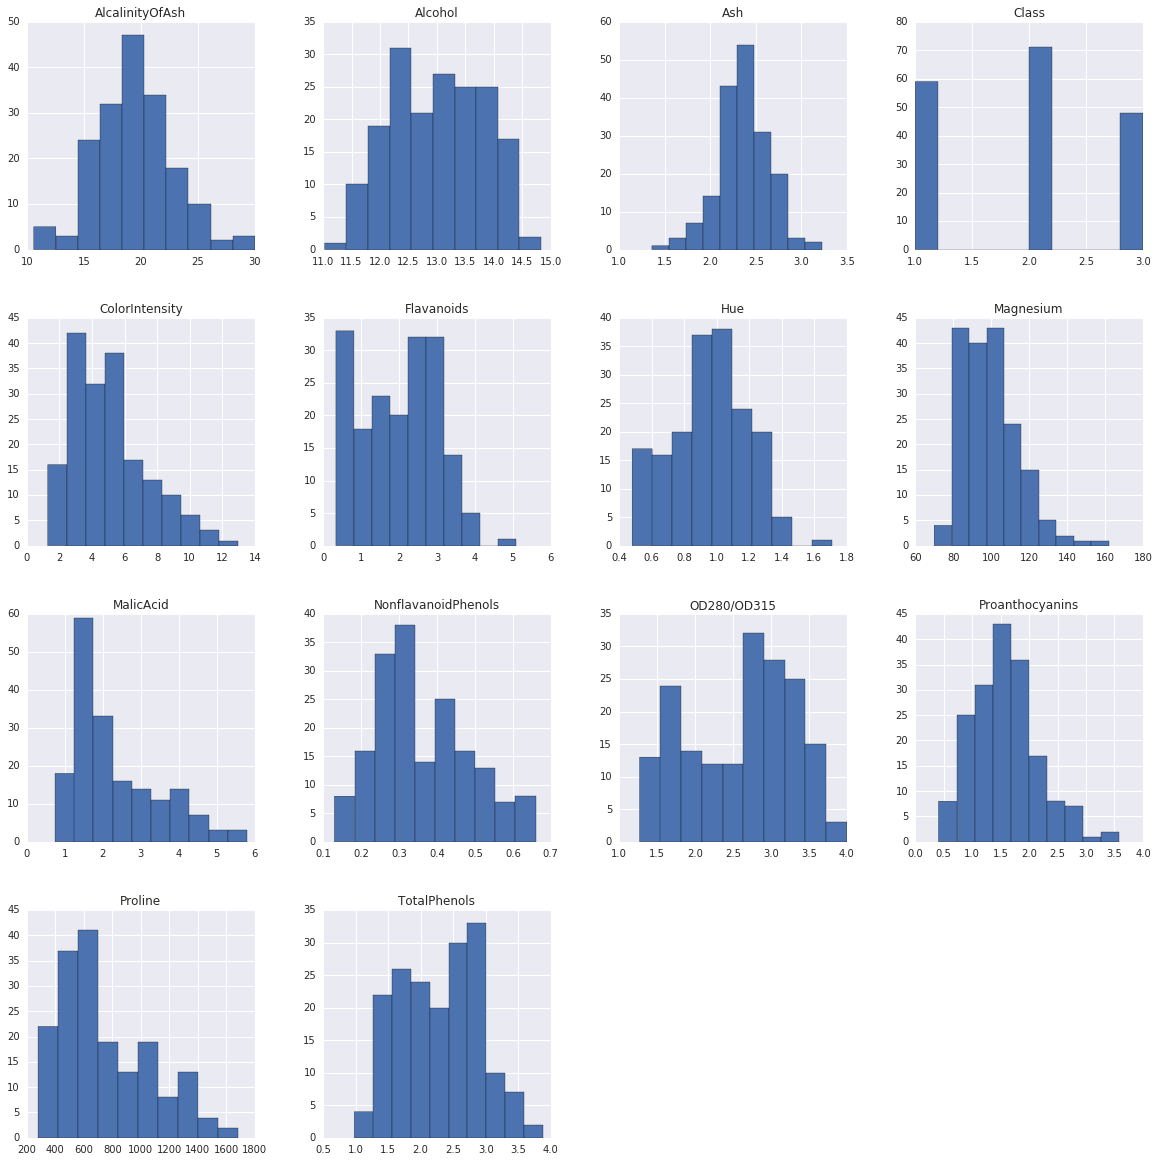

In [39]:
import seaborn as sns
sns.set()  #look and feel of the graphs will change !
dataset.hist(figsize=(20,20))
#dataset.hist? - to get help on all options

In [40]:
mng = plt.get_current_fig_manager()
plt.get_backend()
#mng.Maximize(True)
#plt.show()


'module://ipykernel.pylab.backend_inline'

In [41]:
#plt.tight_layout()
plt.savefig('filename.png', bbox_inches='tight')

In [42]:
figure = plt.gcf() # get current figure
figure.set_size_inches(20, 20)
plt.show()

In [43]:
dataset.head()
y = dataset['Class']          # Split off classifications
X = dataset.ix[:, 'Alcohol':] # Split off features

In [44]:
y.shape

(178,)

In [45]:
X.shape

(178, 13)

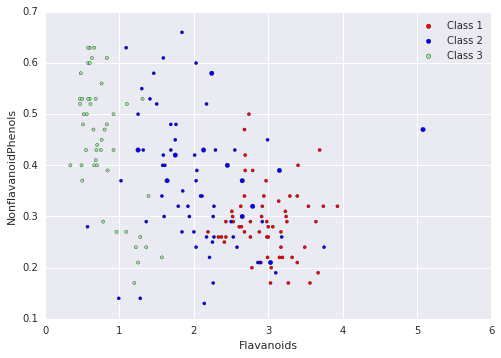

In [46]:
# three different scatter series so the class labels in the legend are distinct
plt.scatter(X[y==1]['Flavanoids'], X[y==1]['NonflavanoidPhenols'],s=y*10, label='Class 1', c='red')
plt.scatter(X[y==2]['Flavanoids'], X[y==2]['NonflavanoidPhenols'],s=y*10, label='Class 2', c='blue')
plt.scatter(X[y==3]['Flavanoids'], X[y==3]['NonflavanoidPhenols'],s=y*10, label='Class 3', c='lightgreen')

# Prettify the graph
_=plt.legend()  #_ is a dummy variable
_=plt.xlabel('Flavanoids')
plt.ylabel('NonflavanoidPhenols');  #semi colon has same impact as _
# display
plt.show() #The downside of this approach is that there are (n2)=n(n−1)2(n2)=n(n−1)2 such plots for nn-dimensional an dataset, so viewing the entire dataset this way can be difficult.

In [47]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=20, c=None, marker=u'o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of x vs y, where x and y are sequence like objects
    of the same lengths.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional, default: 20
        size in points^2.
    
    c : color or sequence of color, optional, default : 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array of
        values to be colormapped.  `c` can be a 2-D arr

In [48]:
X_norm=(X-X.mean())/(X.max()-X.min())

In [49]:
X.mean()

Alcohol                 13.000618
MalicAcid                2.336348
Ash                      2.366517
AlcalinityOfAsh         19.494944
Magnesium               99.741573
TotalPhenols             2.295112
Flavanoids               2.029270
NonflavanoidPhenols      0.361854
Proanthocyanins          1.590899
ColorIntensity           5.058090
Hue                      0.957449
OD280/OD315              2.611685
Proline                746.893258
dtype: float64

In [50]:
X.max()

Alcohol                  14.83
MalicAcid                 5.80
Ash                       3.23
AlcalinityOfAsh          30.00
Magnesium               162.00
TotalPhenols              3.88
Flavanoids                5.08
NonflavanoidPhenols       0.66
Proanthocyanins           3.58
ColorIntensity           13.00
Hue                       1.71
OD280/OD315               4.00
Proline                1680.00
dtype: float64

In [51]:
X.min()

Alcohol                 11.03
MalicAcid                0.74
Ash                      1.36
AlcalinityOfAsh         10.60
Magnesium               70.00
TotalPhenols             0.98
Flavanoids               0.34
NonflavanoidPhenols      0.13
Proanthocyanins          0.41
ColorIntensity           1.28
Hue                      0.48
OD280/OD315              1.27
Proline                278.00
dtype: float64

In [52]:
X_norm.iloc[0:5,:]

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,0.323522,-0.123784,0.033948,-0.200770,0.296287,0.174099,0.217454,-0.154441,0.220537,0.049651,0.067114,0.479236,0.226895
1,0.052469,-0.109950,-0.121132,-0.427574,0.002809,0.122375,0.154163,-0.192177,-0.098075,-0.057857,0.075244,0.288760,0.216196
2,0.041943,0.004674,0.162290,-0.046131,0.013679,0.174099,0.255428,-0.116706,0.384574,0.053064,0.058984,0.204511,0.312487
3,0.360364,-0.076353,0.071381,-0.138915,0.144113,0.536168,0.308171,-0.229913,0.185836,0.233951,-0.079227,0.307075,0.522901
4,0.062995,0.050129,0.269242,0.077580,0.198461,0.174099,0.139395,0.053106,0.072272,-0.062977,0.067114,0.116599,-0.008483


In [53]:
X.iloc[0:5,:]

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [54]:
X_norm.shape

(178, 13)

In [55]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))


In [56]:
transformed.shape

(178, 2)

In [57]:
transformed.head()

,0,1
0,-0.706336,0.253193
1,-0.484977,0.008823
2,-0.521172,0.189187
3,-0.821644,0.580906
4,-0.202546,0.059467


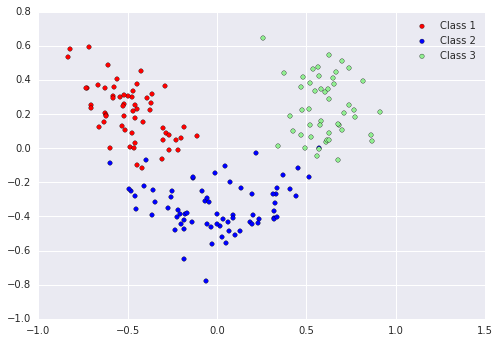

In [58]:
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()

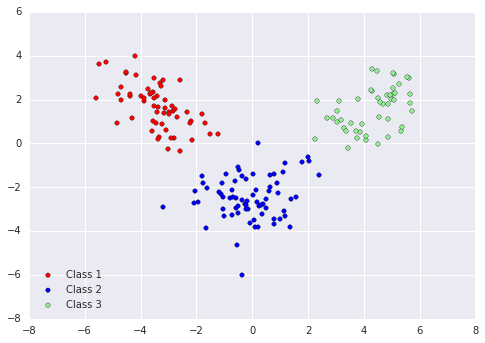

In [59]:
lda = LDA(n_components=2) #2-dimensional LDA similar to PCA
lda_transformed = pd.DataFrame(lda.fit_transform(X_norm, y))

# Plot all three series
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==3][0], lda_transformed[y==3][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)

plt.show()

In [60]:
# Concat classes with the normalized data

dataset.head()


,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


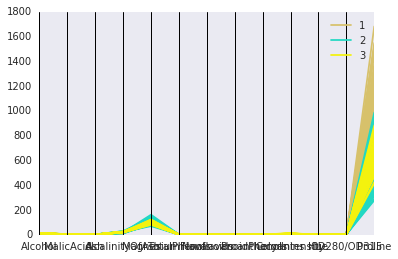

In [86]:
# Perform parallel coordinate plot
parallel_coordinates(dataset,'Class') #color changes according to the class col values 0,1,2,...
#plt.yticks([0,1,2,3,4,5])


In [81]:
parallel_coordinates?


In [63]:
# class distribution
print(dataset.groupby('Class').size())

Class
1    59
2    71
3    48
dtype: int64


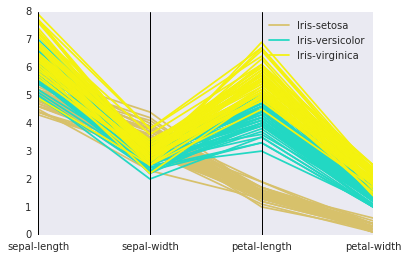

In [87]:
# Load another dataset and try 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names_flw = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset_flw = pd.read_csv(url, names=names_flw)
parallel_coordinates(dataset_flw,'class')


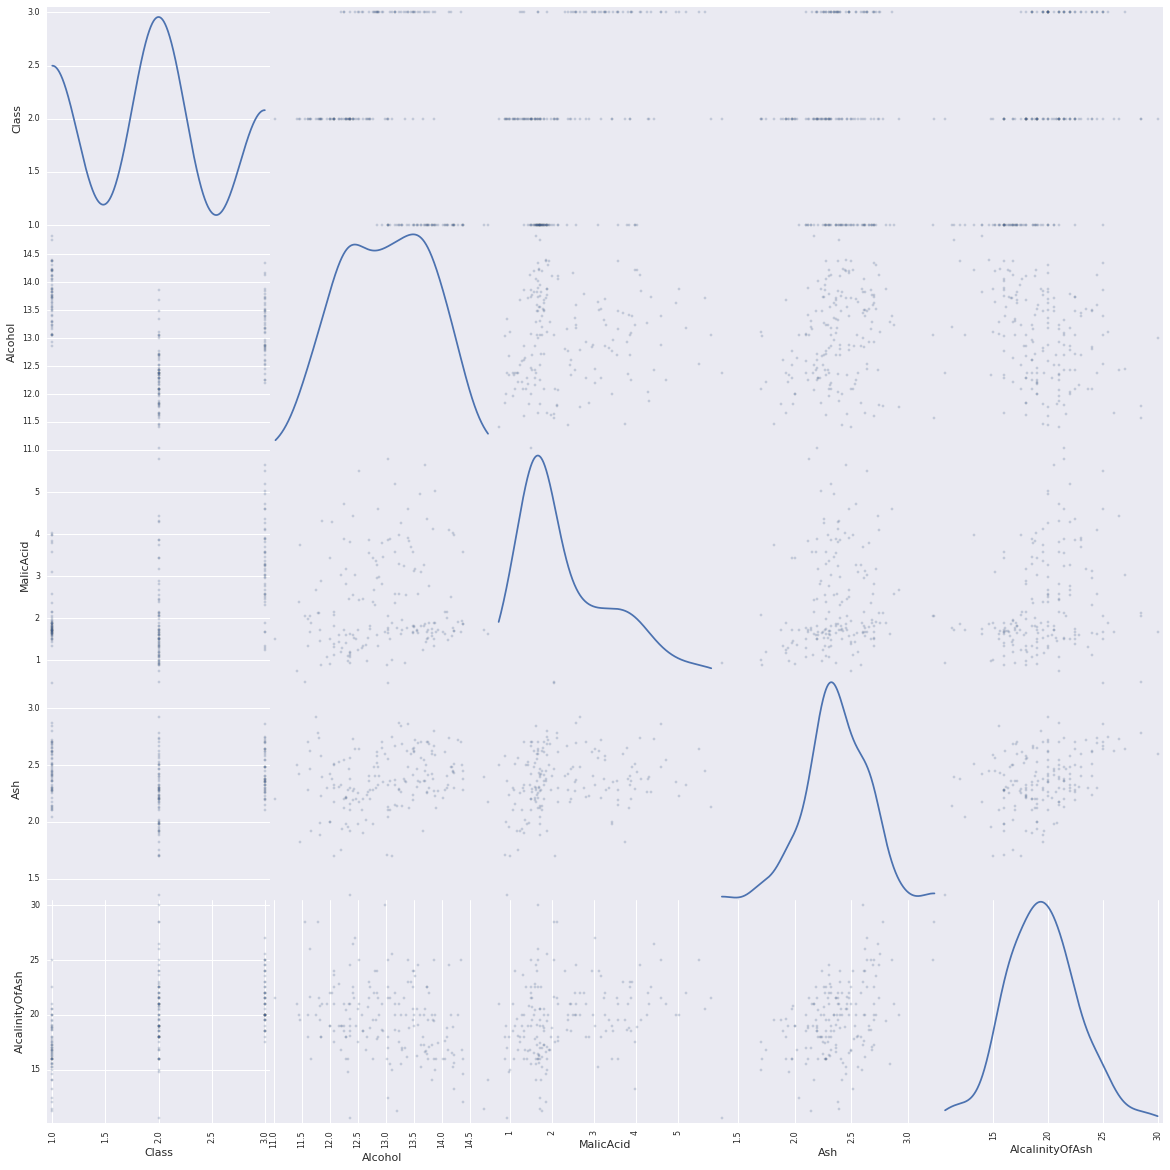

In [65]:


#first make some fake data with same layout as yours
#data = pd.DataFrame(np.random.randn(100, 10), columns=['x1', 'x2', 'x3',\
                   # 'x4','x5','x6','x7','x8','x9','x10'])

#now plot using pandas 
scatter_matrix(dataset.iloc[:,0:5], alpha=0.2, figsize=(20,20), diagonal='kde')
plt.show()

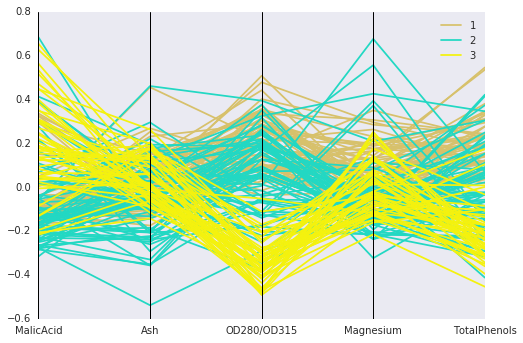

In [66]:
# Select features to include in the plot
plot_feat = ['MalicAcid', 'Ash', 'OD280/OD315', 'Magnesium','TotalPhenols']

# Concat classes with the normalized data
data_norm = pd.concat([X_norm[plot_feat], y], axis=1)

# Perform parallel coordinate plot
parallel_coordinates(data_norm, 'Class')
plt.show()

In [67]:
#Linear Regression
%matplotlib inline  
#above line sets the backend of matplotlib to the 'inline' backend we cannot write the comment there because it takes it as the argument.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
my_land=pd.read_csv("https://raw.githubusercontent.com/IBMDevConnect17/DSX_HandsOn/master/RealestateData.csv")
type(my_land)

pandas.core.frame.DataFrame

In [68]:
my_land.head()

,No.,square_feet,price
0,1,150,6450
1,2,200,7450
2,3,250,8450
3,4,300,9450
4,5,350,11450


In [69]:
my_land.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [70]:
my_land.set_index(['No.'])

,square_feet,price
No.,,
1,150,6450
2,200,7450
3,250,8450
4,300,9450
5,350,11450
6,400,15450
7,600,18450
NaN,NaN,NaN
NaN,NaN,NaN


In [71]:
my_land.dropna()

,No.,square_feet,price
0,1,150,6450
1,2,200,7450
2,3,250,8450
3,4,300,9450
4,5,350,11450
5,6,400,15450
6,7,600,18450


In [72]:
my_land #original one is retained

,No.,square_feet,price
0,1,150,6450
1,2,200,7450
2,3,250,8450
3,4,300,9450
4,5,350,11450
5,6,400,15450
6,7,600,18450
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [73]:
my_land=my_land.dropna()

In [74]:
my_land #now impacted in original copy

,No.,square_feet,price
0,1,150,6450
1,2,200,7450
2,3,250,8450
3,4,300,9450
4,5,350,11450
5,6,400,15450
6,7,600,18450


In [75]:
X=my_land['square_feet']
X

0    150
1    200
2    250
3    300
4    350
5    400
6    600
Name: square_feet, dtype: float64

In [76]:
y=my_land['price']
y

0     6450
1     7450
2     8450
3     9450
4    11450
5    15450
6    18450
Name: price, dtype: float64

In [77]:
type(X)

pandas.core.series.Series

In [78]:
help(linear_model)

Help on package sklearn.linear_model in sklearn:

NAME
    sklearn.linear_model

FILE
    /usr/local/src/bluemix_jupyter_bundle.v59/notebook/lib/python2.7/site-packages/sklearn/linear_model/__init__.py

DESCRIPTION
    The :mod:`sklearn.linear_model` module implements generalized linear models. It
    includes Ridge regression, Bayesian Regression, Lasso and Elastic Net
    estimators computed with Least Angle Regression and coordinate descent. It also
    implements Stochastic Gradient Descent related algorithms.

PACKAGE CONTENTS
    base
    bayes
    cd_fast
    coordinate_descent
    least_angle
    logistic
    omp
    passive_aggressive
    perceptron
    randomized_l1
    ransac
    ridge
    sag
    sag_fast
    setup
    sgd_fast
    stochastic_gradient
    tests (package)
    theil_sen

CLASSES
    sklearn.base.BaseEstimator(__builtin__.object)
        sklearn.linear_model.logistic.LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin

In [79]:

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_5813e2a6ceff482aa1b870d875c2102f(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_4d14e369beca89d0664e278457157a78e8df913f','domain': {'id': '9ef07ea966f9425fb2e0e22ab4894bf6'},
            'password': 'vt]{?l4ZfmTA/j5^'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_5813e2a6ceff482aa1b870d875c2102f('SherryProject1', 'GoSales_Tx_LogisticRegression.csv'))
df_data_1.head()


,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
0,False,M,27,Single,Professional
1,False,F,39,Married,Other
2,False,F,39,Married,Other
3,False,F,56,Unspecified,Hospitality
4,False,M,45,Married,Retired
